In [12]:
import pandas as pd
from pyspark.sql.functions import col, count, when

In [13]:
df = spark.read.csv(
                      path = "/user/ashok/data_files/visa/EasyVisa.csv",
                      inferSchema = True,
                      header = True,   
                      )

In [14]:
df.show(10)

+-------+-------------+---------------------+------------------+---------------------+---------------+-----------+--------------------+---------------+------------+------------------+-----------+
|case_id|    continent|education_of_employee|has_job_experience|requires_job_training|no_of_employees|yr_of_estab|region_of_employment|prevailing_wage|unit_of_wage|full_time_position|case_status|
+-------+-------------+---------------------+------------------+---------------------+---------------+-----------+--------------------+---------------+------------+------------------+-----------+
| EZYV01|         Asia|          High School|                 N|                    N|          14513|       2007|                West|       592.2029|        Hour|                 Y|     Denied|
| EZYV02|         Asia|             Master's|                 Y|                    N|           2412|       2002|           Northeast|       83425.65|        Year|                 Y|  Certified|
| EZYV03|         As

In [15]:
from pyspark.sql.functions import col, count, when

# Checking for null values in each column
null_counts = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])


null_counts.show()

+-------+---------+---------------------+------------------+---------------------+---------------+-----------+--------------------+---------------+------------+------------------+-----------+
|case_id|continent|education_of_employee|has_job_experience|requires_job_training|no_of_employees|yr_of_estab|region_of_employment|prevailing_wage|unit_of_wage|full_time_position|case_status|
+-------+---------+---------------------+------------------+---------------------+---------------+-----------+--------------------+---------------+------------+------------------+-----------+
|      0|        0|                    0|                 0|                    0|              0|          0|                   0|              0|           0|                 0|          0|
+-------+---------+---------------------+------------------+---------------------+---------------+-----------+--------------------+---------------+------------+------------------+-----------+



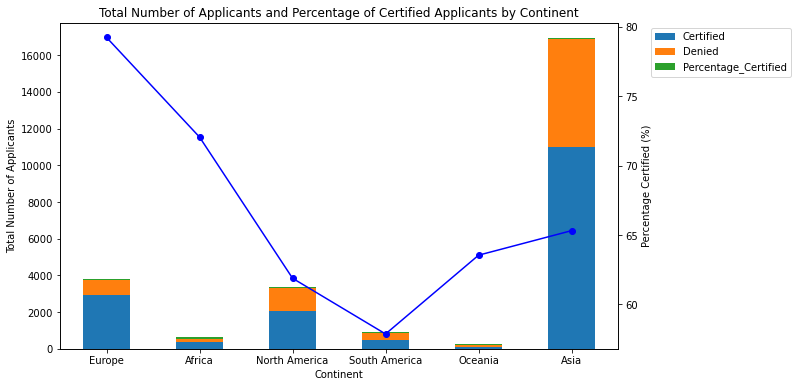

In [16]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
filtered_df = df.filter((df['case_status'] == 'Denied') | (df['case_status'] == 'Certified'))

# Group by 'continent' and 'case_status' and count the number of applicants in each group
grouped_df = filtered_df.groupBy('continent', 'case_status').count()

# Pivot the DataFrame to make 'case_status' values ('Denied' and 'Certified') as columns
pivoted_df = grouped_df.groupBy('continent').pivot('case_status').sum('count').fillna(0)

# Calculate the percentage of 'Certified' cases
pivoted_df = pivoted_df.withColumn('Percentage_Certified', F.col('Certified') / (F.col('Certified') + F.col('Denied')) * 100)

# Convert the DataFrame to a Pandas DataFrame for visualization
pandas_df = pivoted_df.toPandas()

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))

pandas_df.plot(x='continent', kind='bar', stacked=True, ax=ax)
pandas_df.plot(x='continent', y='Percentage_Certified', kind='line', color='blue', marker='o', secondary_y=True, ax=ax)

ax.set_title('Total Number of Applicants and Percentage of Certified Applicants by Continent')
ax.set_xlabel('Continent')
ax.set_ylabel('Total Number of Applicants')
ax.right_ax.set_ylabel('Percentage Certified (%)')

ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0)) 
plt.show()

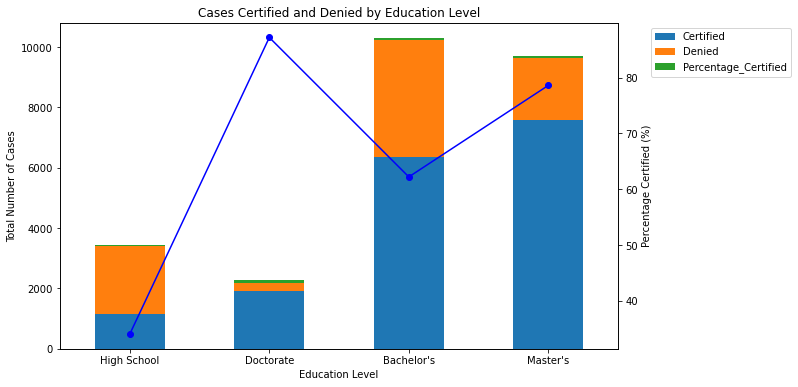

In [17]:
filtered_df = df.filter((df['case_status'] == 'Denied') | (df['case_status'] == 'Certified'))

# Group by 'education_of_employee' and 'case_status' and count the number of applicants in each group
grouped_df = filtered_df.groupBy('education_of_employee', 'case_status').count()

# Pivot the DataFrame to make 'case_status' values ('Denied' and 'Certified') as columns
pivoted_df = grouped_df.groupBy('education_of_employee').pivot('case_status').sum('count').fillna(0)

# Calculate the percentage of 'Certified' cases
pivoted_df = pivoted_df.withColumn('Percentage_Certified', F.col('Certified') / (F.col('Certified') + F.col('Denied')) * 100)

# Convert the DataFrame to a Pandas DataFrame for visualization
pandas_df = pivoted_df.toPandas()

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))

pandas_df.plot(x='education_of_employee', kind='bar', stacked=True, ax=ax)
pandas_df.plot(x='education_of_employee', y='Percentage_Certified', kind='line', color='blue', marker='o', secondary_y=True, ax=ax)

ax.set_title('Cases Certified and Denied by Education Level')
ax.set_xlabel('Education Level')
ax.set_ylabel('Total Number of Cases')
ax.right_ax.set_ylabel('Percentage Certified (%)')

# Move the legend outside the graph
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))

plt.show()

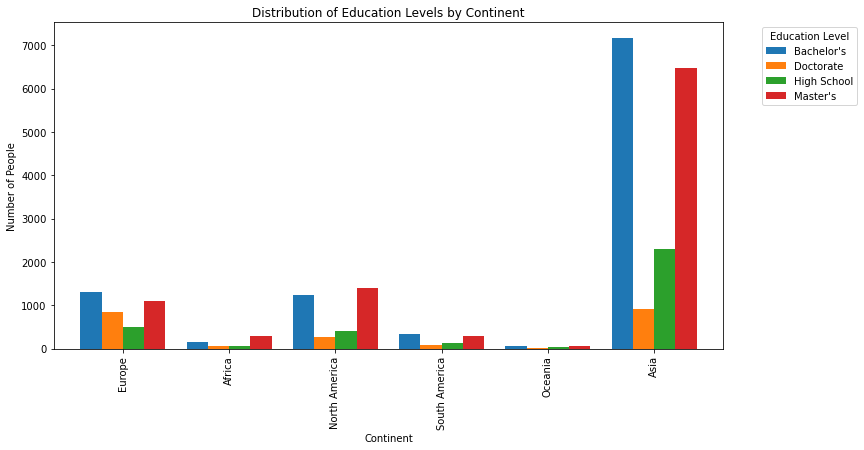

In [18]:
filtered_df = df.select('continent', 'education_of_employee')

# Group by 'continent' and 'education_of_employee' and count the number of people in each group
grouped_df = filtered_df.groupBy('continent', 'education_of_employee').count()

# Pivot the DataFrame to make 'education_of_employee' values as columns
pivoted_df = grouped_df.groupBy('continent').pivot('education_of_employee').sum('count').fillna(0)

# Convert the DataFrame to a Pandas DataFrame for visualization
pandas_df = pivoted_df.toPandas()

# Create a grouped bar chart
pandas_df.plot(x='continent', kind='bar', figsize=(12, 6), width=0.8)
plt.title('Distribution of Education Levels by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of People')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [19]:
pandas_df = df.toPandas()
pandas_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [20]:
uniqueValues=df.select("unit_of_wage").distinct()
uniqueValues.show()

+------------+
|unit_of_wage|
+------------+
|        Year|
|       Month|
|        Hour|
|        Week|
+------------+



In [21]:
from pyspark.ml.feature import StringIndexer

# Create a StringIndexer for the categorical columns
indexer = StringIndexer(inputCols=["continent", "education_of_employee", "has_job_experience", "requires_job_training", "region_of_employment","unit_of_wage", "full_time_position", "case_status" ],
                        outputCols=["continent_ed", "education_of_employee_ed", "has_job_experience_ed", "requires_job_training_ed", "region_of_employment_ed","unit_of_wage_ed", "full_time_position_ed", "case_status_ed"])
encoded_df = indexer.fit(df).transform(df)

# Show the encoded DataFrame
encoded_df.show()

+-------+-------------+---------------------+------------------+---------------------+---------------+-----------+--------------------+---------------+------------+------------------+-----------+------------+------------------------+---------------------+------------------------+-----------------------+---------------+---------------------+--------------+
|case_id|    continent|education_of_employee|has_job_experience|requires_job_training|no_of_employees|yr_of_estab|region_of_employment|prevailing_wage|unit_of_wage|full_time_position|case_status|continent_ed|education_of_employee_ed|has_job_experience_ed|requires_job_training_ed|region_of_employment_ed|unit_of_wage_ed|full_time_position_ed|case_status_ed|
+-------+-------------+---------------------+------------------+---------------------+---------------+-----------+--------------------+---------------+------------+------------------+-----------+------------+------------------------+---------------------+------------------------+----

In [22]:
edf = encoded_df.toPandas()
edf

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,continent_ed,education_of_employee_ed,has_job_experience_ed,requires_job_training_ed,region_of_employment_ed,unit_of_wage_ed,full_time_position_ed,case_status_ed
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,0.0,2.0,1.0,0.0,2.0,1.0,0.0,1.0
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0


In [23]:
# Columns to drop
columns_to_drop = ["case_id","continent","education_of_employee","requires_job_training_ed", "no_of_employees", "full_time_position_ed", "requires_job_training_ed","has_job_experience", "requires_job_training", "region_of_employment","unit_of_wage", "case_status" ,"full_time_position"]
df_ad = encoded_df.drop(*columns_to_drop)
df_ad.show()

+-----------+---------------+------------+------------------------+---------------------+-----------------------+---------------+--------------+
|yr_of_estab|prevailing_wage|continent_ed|education_of_employee_ed|has_job_experience_ed|region_of_employment_ed|unit_of_wage_ed|case_status_ed|
+-----------+---------------+------------+------------------------+---------------------+-----------------------+---------------+--------------+
|       2007|       592.2029|         0.0|                     2.0|                  1.0|                    2.0|            1.0|           1.0|
|       2002|       83425.65|         0.0|                     1.0|                  0.0|                    0.0|            0.0|           0.0|
|       2008|      122996.86|         0.0|                     0.0|                  1.0|                    2.0|            0.0|           1.0|
|       1897|       83434.03|         0.0|                     0.0|                  1.0|                    2.0|            0.0| 

In [24]:
adf = df_ad.toPandas()
adf

,yr_of_estab,prevailing_wage,continent_ed,education_of_employee_ed,has_job_experience_ed,region_of_employment_ed,unit_of_wage_ed,case_status_ed
0,2007,592.2029,0.0,2.0,1.0,2.0,1.0,1.0
1,2002,83425.6500,0.0,1.0,0.0,0.0,0.0,0.0
2,2008,122996.8600,0.0,0.0,1.0,2.0,0.0,1.0
3,1897,83434.0300,0.0,0.0,1.0,2.0,0.0,1.0
4,2005,149907.3900,4.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
25475,2008,77092.5700,0.0,0.0,0.0,1.0,0.0,0.0
25476,2006,279174.7900,0.0,2.0,0.0,0.0,0.0,0.0
25477,1910,146298.8500,0.0,1.0,0.0,1.0,0.0,0.0
25478,1887,86154.7700,0.0,1.0,0.0,2.0,0.0,0.0


In [25]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession

In [26]:
feature_columns =  [col for col in df_ad.columns if col != 'case_status_ed']
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')

In [30]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
predictions = model.transform(test_df)
model = pipeline.fit(train_df)
# Evaluate the model using AUC
evaluator_auc = BinaryClassificationEvaluator(labelCol="case_status_ed", rawPredictionCol="prediction", metricName="areaUnderROC")
roc_auc = evaluator_auc.evaluate(predictions)


# Evaluate the model using accuracy
evaluator_acc = MulticlassClassificationEvaluator(labelCol="case_status_ed", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator_acc.evaluate(predictions)
print("Accuracy:", accuracy)

# Get feature importances
feature_importances = model.stages[-1].featureImportances
for i, imp in enumerate(feature_importances):
    print(f"Feature {feature_columns[i]}: {imp}")

Accuracy: 0.7420971472629144
Feature yr_of_estab: 0.006120294994119797
Feature prevailing_wage: 0.17224493918666717
Feature continent_ed: 0.0382196636567224
Feature education_of_employee_ed: 0.5315451542018057
Feature has_job_experience_ed: 0.13486331241943458
Feature region_of_employment_ed: 0.03227104336004724
Feature unit_of_wage_ed: 0.08473559218120305


In [31]:
rf_classifier = RandomForestClassifier(labelCol="case_status_ed", featuresCol="features", numTrees=100)
pipeline = Pipeline(stages=[vector_assembler, rf_classifier])
(train_df, test_df) = df_ad.randomSplit([0.8, 0.2], seed=123)
model = pipeline.fit(train_df)
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="case_status_ed", rawPredictionCol="prediction", metricName="areaUnderROC")
roc_auc = evaluator.evaluate(predictions)

feature_importances = model.stages[-1].featureImportances
for i, imp in enumerate(feature_importances):
    print(f"Feature {feature_columns[i]}: {imp}")

Feature yr_of_estab: 0.006120294994119797
Feature prevailing_wage: 0.17224493918666717
Feature continent_ed: 0.0382196636567224
Feature education_of_employee_ed: 0.5315451542018057
Feature has_job_experience_ed: 0.13486331241943458
Feature region_of_employment_ed: 0.03227104336004724
Feature unit_of_wage_ed: 0.08473559218120305


In [32]:
import matplotlib.pyplot as plt
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.sql import SparkSession
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from sklearn.metrics import roc_curve, auc
import numpy as np
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(labelCol="case_status_ed", featuresCol="features", numTrees=100)

# Create a pipeline
pipeline = Pipeline(stages=[vector_assembler, rf_classifier])

# Split the data into training and testing sets
(train_df, test_df) = df_ad.randomSplit([0.9, 0.1], seed=123)

# Fit the pipeline to the training data
model = pipeline.fit(train_df)

# Make predictions on the test data
predictions = model.transform(test_df)

# Calculate ROC curve
evaluator = BinaryClassificationEvaluator(labelCol="case_status_ed", rawPredictionCol="prediction", metricName="areaUnderROC")
roc_auc = evaluator.evaluate(predictions)

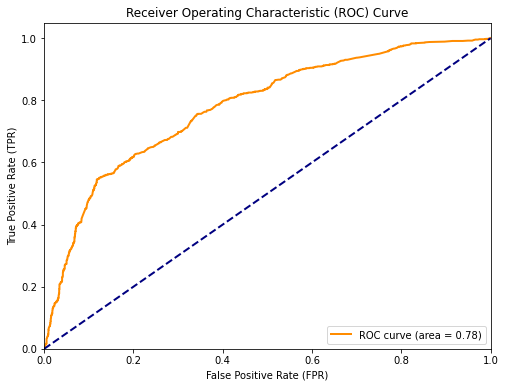

In [33]:
# Extract probability scores for positive class (class 1) as numpy array
probability_scores = np.array(predictions.select("probability").rdd.map(lambda x: x[0][1]).collect())
true_labels = np.array(predictions.select("case_status_ed").rdd.flatMap(lambda x: x).collect())

# Calculate ROC curve
fpr, tpr, _ = roc_curve(true_labels, probability_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [34]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics

predictions = model.transform(test_df)
predictions_and_labels = predictions.select("prediction", "case_status_ed").rdd.map(lambda row: (float(row.prediction), float(row.case_status_ed)))

binary_metrics = BinaryClassificationMetrics(predictions_and_labels)

confusion_df = spark.createDataFrame(predictions_and_labels, ["prediction", "label"])

confusion_matrix = confusion_df.crosstab("prediction", "label").toPandas()
print("Confusion Matrix:")
print(confusion_matrix)

true_positive = confusion_matrix["1.0"][1]
false_positive = confusion_matrix["1.0"][0]
false_negative = confusion_matrix["0.0"][1]

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)

print(f"Precision = {precision:.4f}, Recall = {recall:.4f}")

auc_roc = binary_metrics.areaUnderROC
print(f"AUC-ROC = {auc_roc:.4f}")

auc_pr = binary_metrics.areaUnderPR
print(f"AUC-PR = {auc_pr:.4f}")

accuracy = predictions.filter(predictions["prediction"] == predictions["case_status_ed"]).count() / predictions.count()
print(f"Accuracy = {accuracy:.4f}")

/opt/spark-3.3.0-bin-hadoop3/python/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Confusion Matrix:
  prediction_label   0.0  1.0
0              1.0   124  352
1              0.0  1574  539
Precision = 0.6049, Recall = 0.2551


AUC-ROC = 0.6610
AUC-PR = 0.6199


Accuracy = 0.7439


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get the confusion matrix as a DataFrame
confusion_matrix = metrics.confusionMatrix().toArray()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


NameError: name 'metrics' is not defined

In [ ]:
import xgboost as xgb
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession

# Initialize Spark
spark = SparkSession.builder.appName("XGBoostClassification").getOrCreate()

# Assuming you've defined feature_columns and df_ad as before
# Split data into training and testing sets
train_df, test_df = df_ad.randomSplit([0.8, 0.2], seed=123)

# Define XGBoost model parameters
params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',        # Use logloss as the evaluation metric
    'eta': 0.1,                      # Learning rate
    'max_depth': 6                   # Maximum depth of the tree
}

# Extract feature and label columns
X_train = train_df.select(feature_columns)
y_train = train_df.select('case_status_ed')

X_test = test_df.select(feature_columns)
y_test = test_df.select('case_status_ed')

# Convert Spark DataFrames to Pandas DataFrames
X_train_pandas = X_train.toPandas()
y_train_pandas = y_train.toPandas()

X_test_pandas = X_test.toPandas()
y_test_pandas = y_test.toPandas()

# Create DMatrix for training and testing
dtrain = xgb.DMatrix(X_train_pandas, label=y_train_pandas)
dtest = xgb.DMatrix(X_test_pandas, label=y_test_pandas)

# Train the XGBoost model
num_round = 100  # Number of boosting rounds
xgb_model = xgb.train(params, dtrain, num_round)

# Make predictions
y_pred = xgb_model.predict(dtest)

# Convert predictions to a DataFrame
predictions = spark.createDataFrame([(float(y),) for y in y_pred], ["prediction"])

# Show predictions
predictions.show()
